In [ ]:
# STAGE 1
import tensorflow as tf
import numpy as np


"""
    Objective Stage 1:
    - 1 Import tensorflow and numpy
    - 2 Load MNIST data from tensorflow.keras.datasets
    - 3 Reshape the features array to the 2D array with n rows and m columns
      (n: number of images in the dataset; m: number of pixels in each image)
      --> flatten the features and target arrays
    - 4 Provide the unique target classes' names, the shape of the features array
      and the shape of the target variable in following format: (n, m).
      Print the min and max values of the features array.
"""
# 2 - Load MNIST datasets from tensorflow.keras.datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 3 - Flatten features array with n images and m pixels per image
n1 = np.shape(x_train)[0]
n2 = np.shape(x_test)[0]
m = np.shape(x_train)[1] * np.shape(x_train)[2]
x_train = x_train.reshape(n1, m)
x_test = x_test.reshape(n2, m)

# 4 - Print unique target classes' names, features and target shapes,
# and min & max values of the features array
print("Classes:", np.unique(y_train))
print("Features' shape:", np.shape(x_train))
print("Target's shape:", np.shape(y_train))
print(f"min: {x_train.min()}, max: {x_train.max()}")

11490434/11490434 [==============================] - 0s 0us/step
Classes: [0 1 2 3 4 5 6 7 8 9]
Features' shape: (60000, 784)
Target's shape: (60000,)
min: 0, max: 255


In [ ]:
# Stage 2
import pandas as pd
from sklearn.model_selection import train_test_split

rows_limit = 6000
random_seed = 40

features = np.concatenate((x_train, x_test))  # combined features array
target = np.concatenate((y_train, y_test))  # combined target array

features = pd.DataFrame(features)
target = pd.Series(target)

# Use the first 6000 rows of the dataset
# features = features[:rows_limit]
# target = target[:rows_limit]

# Set the test_size = 0.3 & random_seed 40
X_train, X_test, Y_train, Y_test = train_test_split(features[:rows_limit], 
                                                    target[:rows_limit], test_size=0.3, 
                                                    random_state=random_seed)

# Print shapes of new data and the proportions of sample per class in the training set
print(f"X_train shape: {X_train.shape}",
      f"X_test shape: {X_test.shape}",
      f"Y_train shape: {Y_train.shape}",
      f"Y_test shape: {Y_test.shape}",
      f"Proportion of samples per class in train set:",
      Y_train.value_counts(normalize=True),
      sep='\n')

X_train shape: (4200, 784)
X_test shape: (1800, 784)
Y_train shape: (4200,)
Y_test shape: (1800,)
Proportion of samples per class in train set:
1    0.110238
7    0.108095
4    0.105952
6    0.101905
0    0.101429
9    0.100952
3    0.097619
2    0.096667
8    0.090000
5    0.087143
dtype: float64


In [ ]:
# Stage 3
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

"""def fit_predict_eval(model, features_train, features_test, target_train, target_test):
    model.fit(features_train, target_train)
    # model.predict(features_test)
    score = model.score(features_test, target_test)
    return score

def fit_predict_eval(self):
        #fit the model, make a prediction, calculate accuracy and save it to score
        mod = self.model
        mod.fit(self.X_train, self.y_train)
        y_pred = mod.predict(self.X_test)
        self.score = accuracy_score(self.y_test, y_pred)
        print(f'Model: {self.model}\nAccuracy: {round(self.score, 4)}\n')"""

def fit_predict_eval(model, features_train, features_test, target_train, target_test):
    # here you fit the model
    model.fit(features_train, target_train)
    # make a prediction
    target_predicted = model.predict(features_test)
    # calculate accuracy and save it to score
    score = accuracy_score(target_test, target_predicted)
  
    print(f'Model: {model}\nAccuracy: {score: .4f}\n')
    return score

result_dict = []

models = [['KNeighborsClassifier', KNeighborsClassifier(), 0],
          ['DecisionTreeClassifier', DecisionTreeClassifier(random_state=random_seed), 0],
          ['LogisticRegression', LogisticRegression(random_state=random_seed, solver='liblinear'), 0],
          ['RandomForestClassifier', RandomForestClassifier(random_state=random_seed), 0]]

for item in models:
    item[2] = fit_predict_eval(
                            model=item[1],
                            features_train=X_train,
                            features_test=X_test,
                            target_train=Y_train,
                            target_test=Y_test
                          )

models = sorted(models, key=lambda i: i[2], reverse=True)




Model: KNeighborsClassifier()
Accuracy:  0.9350

Model: DecisionTreeClassifier(random_state=40)
Accuracy:  0.7606

Model: LogisticRegression(random_state=40, solver='liblinear')
Accuracy:  0.8306

Model: RandomForestClassifier(random_state=40)
Accuracy:  0.9394



In [ ]:
print(f'The answer to the question: {models[0][0]} - {round(models[0][2], 3)}')

The answer to the question: RandomForestClassifier - 0.939


In [ ]:
from sklearn.preprocessing import Normalizer

def fit_predict_eval_norm(model, features_train, features_test, target_train, target_test):
    # here you fit the model
    model.fit(features_train, target_train)
    # make a prediction
    target_predicted = model.predict(features_test)
    # calculate accuracy and save it to score
    score = accuracy_score(target_test, target_predicted)
    print(f'Model: {model}\nAccuracy: {score: .4f}\n')
    return score

X_train_norm = Normalizer().transform(X_train)
X_test_norm = Normalizer().transform(X_test)

for item in models:
    item[2] = fit_predict_eval_norm(
                            model=item[1],
                            features_train=X_train_norm,
                            features_test=X_test_norm,
                            target_train=Y_train,
                            target_test=Y_test
                          )

models = sorted(models, key=lambda i: i[2], reverse=True)

Model: KNeighborsClassifier()
Accuracy:  0.9533

Model: RandomForestClassifier(random_state=40)
Accuracy:  0.9367

Model: LogisticRegression(random_state=40, solver='liblinear')
Accuracy:  0.8828

Model: DecisionTreeClassifier(random_state=40)
Accuracy:  0.7806



In [ ]:
print('The answer to the 1st question: yes')
print(f'The answer to the 2nd question: '
      f'{models[0][0]} - {round(models[0][2], 3)}, '
      f'{models[1][0]} - {round(models[1][2], 3)}')

The answer to the 1st question: yes
The answer to the 2nd question: KNeighborsClassifier - 0.953, RandomForestClassifier - 0.937


In [ ]:
from sklearn.preprocessing import Normalizer
X_train, X_test, Y_train, Y_test = train_test_split(features, 
                                                    target, test_size=0.2, 
                                                    random_state=random_seed)

# Print shapes of new data and the proportions of sample per class in the training set
print(f"X_train shape: {X_train.shape}",
      f"X_test shape: {X_test.shape}",
      f"Y_train shape: {Y_train.shape}",
      f"Y_test shape: {Y_test.shape}",
      f"Proportion of samples per class in train set:",
      Y_train.value_counts(normalize=True),
      sep='\n')

X_train_norm = Normalizer().transform(X_train)
X_test_norm = Normalizer().transform(X_test)

X_train shape: (56000, 784)
X_test shape: (14000, 784)
Y_train shape: (56000,)
Y_test shape: (14000,)
Proportion of samples per class in train set:
1    0.112750
7    0.104214
3    0.101893
9    0.099536
2    0.099018
6    0.098518
0    0.098143
8    0.097214
4    0.097071
5    0.091643
dtype: float64


In [ ]:
from sklearn.model_selection import GridSearchCV


def fit_predict_eval_ht(model, features_train, features_test, target_train, target_test):
    # here you fit the model
    model.fit(features_train, target_train)
    # make a prediction
    predicted_target = model.predict(features_test)
    # calculate accuracy and save it to score
    score = accuracy_score(target_test, predicted_target)
    print(f'Model: {model}\nAccuracy: {score: .4f}\n')
    return score
    
knn_estimator = KNeighborsClassifier()
knn_param_grid = dict(n_neighbors=[3, 4], weights=['uniform', 'distance'],
                          algorithm=['auto', 'brute'])
knn_grid_search = GridSearchCV(estimator=knn_estimator, param_grid=knn_param_grid,
                                   scoring='accuracy', n_jobs=-1)

rf_estimator = RandomForestClassifier(random_state=random_seed)
rf_param_grid = dict(n_estimators=[300, 500], max_features=['auto', 'log2'],
                         class_weight=['balanced', 'balanced_subsample'])
rf_grid_search = GridSearchCV(estimator=rf_estimator, param_grid=rf_param_grid,
                                  scoring='accuracy', n_jobs=-1)

    # 3 - Run the fit method for GridSearchCV (use train set only)
knn_grid_search.fit(X_train_norm, Y_train)
knn_best_estimator = knn_grid_search.best_estimator_
rf_grid_search.fit(X_train_norm, Y_train)
rf_best_estimator = rf_grid_search.best_estimator_
model2 = [['knn_best_estimator', knn_best_estimator, 0],
          ['rf_best_estimator', rf_best_estimator, 0]]

    # 4 - Print the best sets of parameters for both algorithms.
    #     (Get the info from attribute called best_estimator_ of each algorithm)
    #     Train two best estimators on the test set and print their accuracies.

for item in model2:
    item[2] = fit_predict_eval_ht(
                            model=item[1],
                            features_train=X_train_norm,
                            features_test=X_test_norm,
                            target_train=Y_train,
                            target_test=Y_test
                          )

model2 = sorted(model2, key=lambda i: i[2], reverse=True)
"""print("K-nearest neighbours algorithm")
print("best estimator:", knn_best_estimator)
print(f"accuracy: {result_dict[knn_best_estimator]: .3f}\n")
print("Random forest algorithm")
print("best estimator:", rf_best_estimator)
print(f"accuracy: {result_dict[rf_best_estimator]: .3f}\n")"""



Model: KNeighborsClassifier(n_neighbors=4, weights='distance')
Accuracy:  0.9780

Model: RandomForestClassifier(class_weight='balanced_subsample', n_estimators=500,
                       random_state=40)
Accuracy:  0.9704



'print("K-nearest neighbours algorithm")\nprint("best estimator:", knn_best_estimator)\nprint(f"accuracy: {result_dict[knn_best_estimator]: .3f}\n")\nprint("Random forest algorithm")\nprint("best estimator:", rf_best_estimator)\nprint(f"accuracy: {result_dict[rf_best_estimator]: .3f}\n")'

In [ ]:

knn_classifier = model2[0][1]
rf_classifier = model2[1][1]
print(knn_classifier)
print(rf_classifier)


KNeighborsClassifier(n_neighbors=4, weights='distance')
RandomForestClassifier(class_weight='balanced_subsample', n_estimators=500,
                       random_state=40)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

knn_predict = knn_classifier.predict(X_test_norm)
rf_predict = rf_classifier.predict(X_test_norm)

print('Classification report for knn_classifier\n')
print(classification_report(Y_test, knn_predict))


Classification report for knn_classifier

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1407
           1       0.98      1.00      0.99      1563
           2       0.99      0.98      0.99      1445
           3       0.98      0.97      0.97      1435
           4       0.99      0.97      0.98      1388
           5       0.98      0.96      0.97      1181
           6       0.98      0.99      0.99      1359
           7       0.98      0.98      0.98      1457
           8       0.98      0.96      0.97      1381
           9       0.95      0.97      0.96      1384

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



In [ ]:
print('Classification report for rf_classifier\n')
print(classification_report(Y_test, rf_predict))


Classification report for rf_classifier

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1407
           1       0.98      0.99      0.98      1563
           2       0.97      0.97      0.97      1445
           3       0.96      0.96      0.96      1435
           4       0.96      0.98      0.97      1388
           5       0.98      0.96      0.97      1181
           6       0.98      0.99      0.98      1359
           7       0.98      0.97      0.97      1457
           8       0.96      0.95      0.96      1381
           9       0.96      0.95      0.96      1384

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [ ]:
print('Confusion matrix for knn_classifier\n')
print(confusion_matrix(Y_test,knn_predict))


Confusion matrix for knn_classifier

[[1399    1    2    0    0    0    4    0    1    0]
 [   0 1557    1    1    1    0    0    2    0    1]
 [   4    2 1419    3    0    0    2    8    5    2]
 [   2    3    5 1391    0   12    0    6   13    3]
 [   1    6    0    0 1347    0    3    3    1   27]
 [   8    1    1   13    1 1131   13    1    6    6]
 [   4    2    0    0    0    3 1350    0    0    0]
 [   0    8    5    1    4    0    0 1425    0   14]
 [   3   10    2   10    6    6    4    2 1327   11]
 [   7    2    1    7    6    2    0    7    6 1346]]


In [ ]:
print('Confusion matrix for rf_classifier\n')
print(confusion_matrix(Y_test,rf_predict))

Confusion matrix for rf_classifier

[[1389    1    3    0    1    1    6    0    6    0]
 [   0 1545    3    3    3    1    1    3    2    2]
 [   6    3 1401    5    9    0    4    6   10    1]
 [   2    4   18 1371    0   10    0   11   15    4]
 [   3    2    2    0 1354    0    5    2    4   16]
 [   2    3    2   12    2 1138   11    4    4    3]
 [   6    5    0    0    0    3 1343    0    2    0]
 [   1    6    8    2    9    0    0 1415    1   15]
 [   3    5    9   10   12   10    5    1 1312   14]
 [   6    3    4   21   14    2    1    8    7 1318]]


In [ ]:
print(X_test_norm.shape)
X_test_norm.dtype

(14000, 784)


dtype('float64')

In [ ]:
X_test_norm[1].shape

(784,)

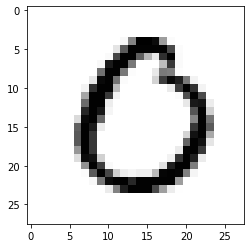

In [ ]:
from matplotlib import pyplot as plt
img0 = plt.imshow(X_test_norm[13999].reshape(28,28), cmap = "Greys")
plt.show()

In [ ]:
import joblib
joblib.dump(knn_classifier, "knn_hwd_classifier.pkl")

['knn_hwd_classifier.pkl']

In [ ]:
joblib.dump(rf_classifier, "rf_hwd_classifier.pkl")

['rf_hwd_classifier.pkl']

In [ ]:
from google.colab import files 
uploaded = files.upload()

In [ ]:
import joblib
classifier1 = joblib.load('knn_hd_classifier.pkl')

In [ ]:
classifier1.predict([X_test_norm[10000]])

array([2], dtype=uint8)

In [ ]:
classifier1.predict([X_test_norm[13999]])

array([0], dtype=uint8)

In [ ]:
X_test_norm[13999]